#📘 Practical Title: Long-Sequence Forecasting using LSTM & GRU (with Synthetic Data)


💡 Goal:

Generate synthetic long-sequence time series data

Prepare it for supervised learning

Train and compare LSTM and GRU models for next-step prediction

#🧪 Libraries Required


In [1]:
# Cell 1
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from sklearn.preprocessing import MinMaxScaler


#🧬 Step 1: Generate Synthetic Time Series Data

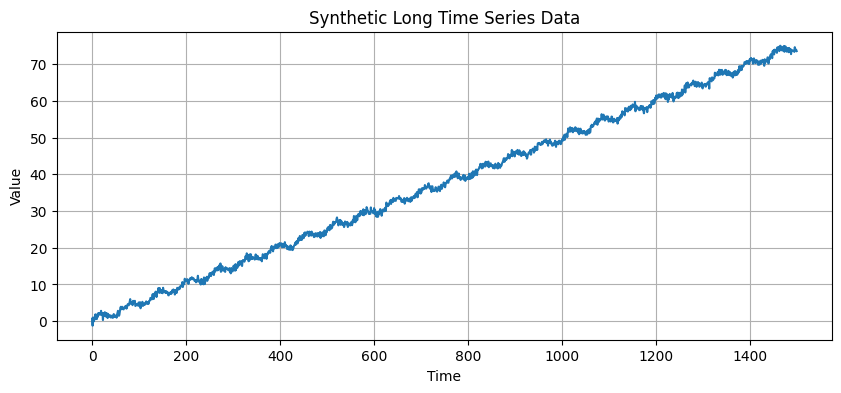

In [2]:
# Cell 2
def generate_synthetic_data(length=1000):
    # Long sequence: sin wave with trend and noise
    time = np.arange(length)
    series = 0.05 * time + np.sin(0.1 * time) + 0.5 * np.random.randn(length)
    return time, series

# Generate
time, series = generate_synthetic_data(1500)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(time, series)
plt.title("Synthetic Long Time Series Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()


#📊 Step 2: Prepare Data for Supervised Learning

In [3]:
# Cell 3
def create_dataset(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size])
    return np.array(X), np.array(y)

# Parameters
WINDOW_SIZE = 50

# Normalize data
scaler = MinMaxScaler()
series_scaled = scaler.fit_transform(series.reshape(-1, 1)).flatten()

# Create input-output pairs
X, y = create_dataset(series_scaled, WINDOW_SIZE)

# Reshape for RNN input: [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into train/test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("✅ Dataset ready — Shape:", X_train.shape)


✅ Dataset ready — Shape: (1160, 50, 1)


#🔁 Step 3: Build and Train LSTM Model


In [4]:
# Cell 4
lstm_model = Sequential([
    LSTM(64, input_shape=(WINDOW_SIZE, 1)),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')

# Train LSTM
lstm_history = lstm_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.1426 - val_loss: 0.0134
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0026 - val_loss: 2.8478e-04
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.9532e-04 - val_loss: 7.2950e-04
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 1.8251e-04 - val_loss: 4.2728e-04
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 1.6664e-04 - val_loss: 1.7571e-04
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 1.4310e-04 - val_loss: 1.1802e-04
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 1.3233e-04 - val_loss: 1.6826e-04
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 1.1842e-04 - val_loss: 9.5769e-05
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 1.1086e-04 - val_loss: 9.9311e-05
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.1221e-04 - val_loss: 1.0599e-04


#🔁 Step 4: Build and Train GRU Model

In [5]:
# Cell 5
gru_model = Sequential([
    GRU(64, input_shape=(WINDOW_SIZE, 1)),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mse')

# Train GRU
gru_history = gru_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0238 - val_loss: 4.0133e-04
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 7.3280e-04 - val_loss: 1.0350e-04
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 6.4933e-05 - val_loss: 7.3708e-05
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 5.9032e-05 - val_loss: 7.5335e-05
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 6.1869e-05 - val_loss: 6.9339e-05
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 5.9978e-05 - val_loss: 6.4987e-05
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 6.0815e-05 - val_loss: 7.0574e-05
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 6.7653e-05 - val_loss: 6.6482e-05
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 5.7938e-05 - val_loss: 6.7776e-05
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 6.0700e-05 - val_loss: 6.5700e-05


#📈 Step 5: Plot Loss Curves

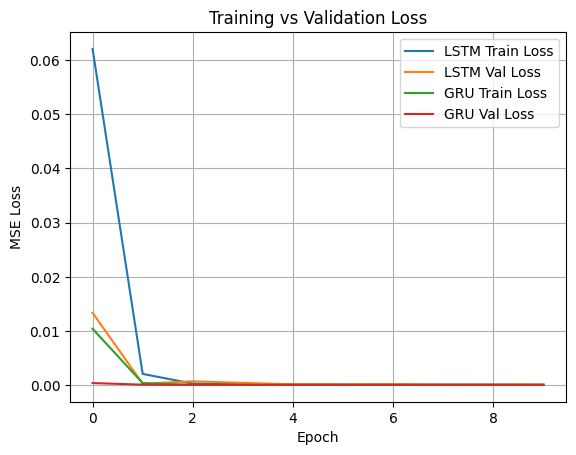

In [6]:
# Cell 6
plt.plot(lstm_history.history['loss'], label='LSTM Train Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Val Loss')
plt.plot(gru_history.history['loss'], label='GRU Train Loss')
plt.plot(gru_history.history['val_loss'], label='GRU Val Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()


#🔮 Step 6: Make Predictions and Plot Results

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


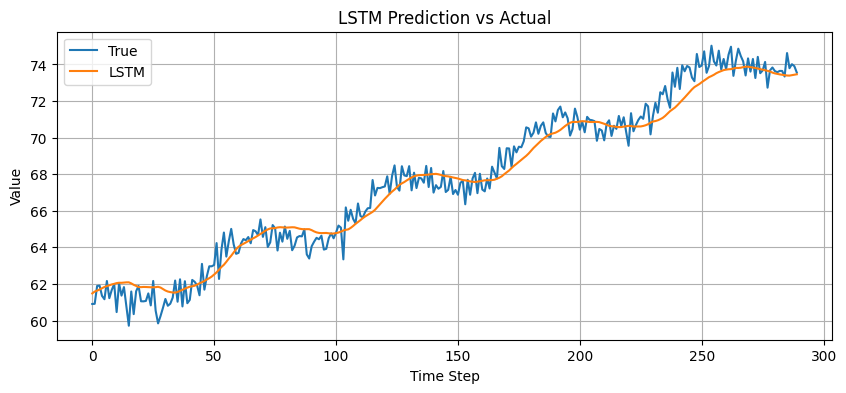

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


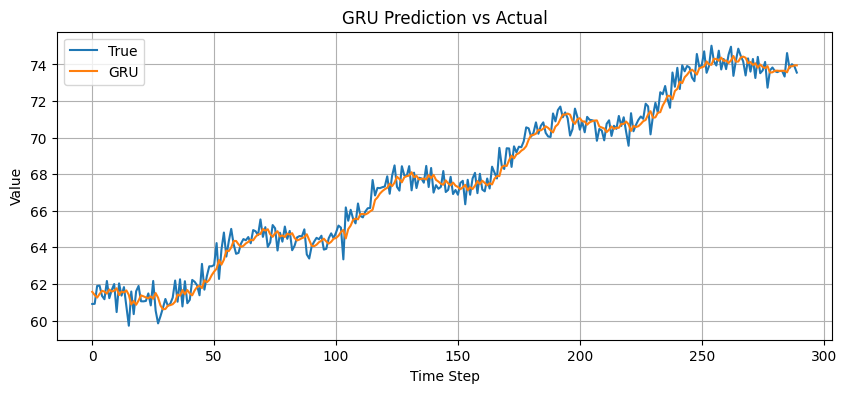

In [7]:
# Cell 7
def forecast(model, X, y_true, label):
    y_pred = model.predict(X)
    y_pred_inv = scaler.inverse_transform(y_pred)
    y_true_inv = scaler.inverse_transform(y_true.reshape(-1, 1))

    plt.figure(figsize=(10, 4))
    plt.plot(y_true_inv, label='True')
    plt.plot(y_pred_inv, label=label)
    plt.title(f"{label} Prediction vs Actual")
    plt.xlabel("Time Step")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()

forecast(lstm_model, X_test, y_test, "LSTM")
forecast(gru_model, X_test, y_test, "GRU")


#📌 Summary

| Component    | Model 1 (LSTM)     | Model 2 (GRU)      |
| ------------ | ------------------ | ------------------ |
| Input Shape  | `(samples, 50, 1)` | `(samples, 50, 1)` |
| Hidden Units | 64                 | 64                 |
| Output       | 1-step ahead       | 1-step ahead       |
| Loss         | MSE                | MSE                |
